### Introdução

O objetivo deste projeto é utilizar técnicas avançadas de regressão para prever o preço de vendas de imóveis a partir de diversas características dos imóveis. Para isso, foi selecionado o Dataset <b>"House Prices - Advanced Regression Techniques"</b> disponível no site do <b>Kaggle</b>, que contém informações detalhadas sobre as características dos imóveis, tais como número de vagas na garagem, tamanho do lote, material do telhado, entre outras. Além disso, a base de dados também inclui informações sobre o processo de venda dos imóveis e seus respectivos preços de vendas.
Para o desenvolvimento deste projeto, foi utilizada a tecnologia <b>AutoML</b> e a biblioteca <b>PyCaret</b>.

<strong>Descrição das variáveis

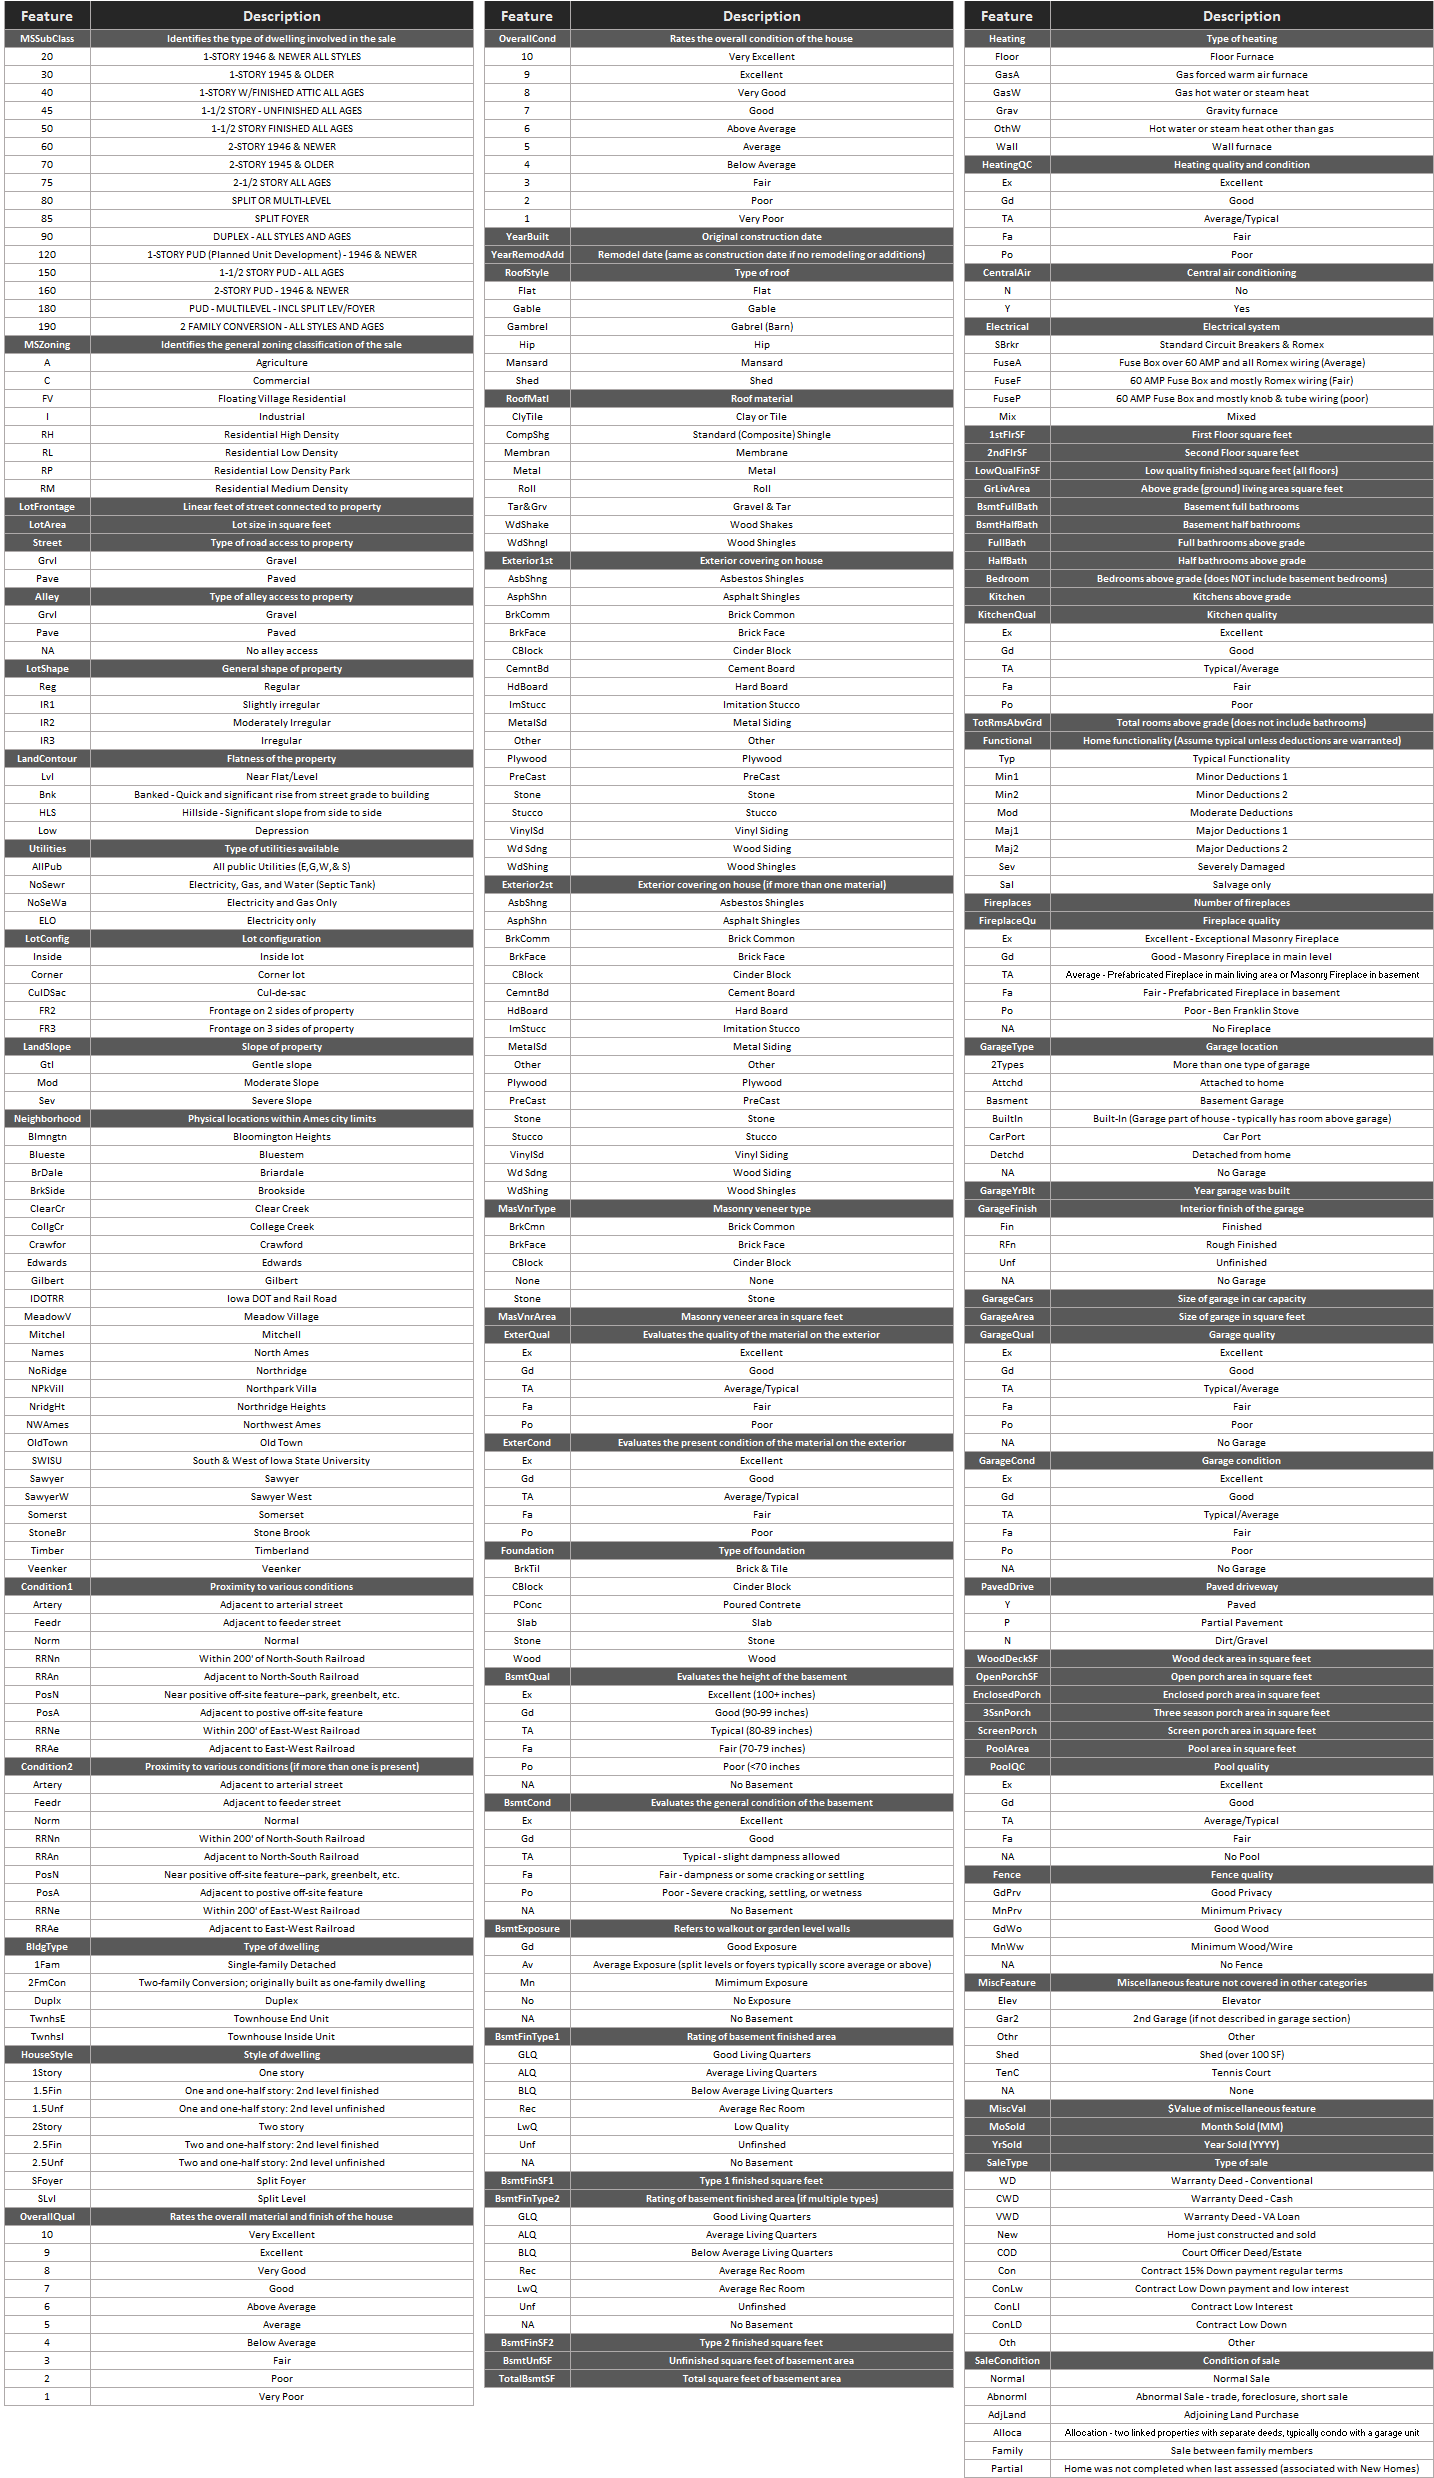

<strong> Importação das Bibliotecas 

In [1]:
import pycaret
import pandas as pd

**Extração do dataset**

In [2]:

url = 'https://raw.githubusercontent.com/FernandoBarbosaB/House_Prediction_with_PyCaret/main/train.csv'
df = pd.read_csv(url,index_col=0).reset_index()
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
293,294,60,RL,NaN,16659,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,235000
1435,1436,20,RL,80.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Abnorml,174000
1114,1115,20,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,117000
785,786,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,161500
506,507,60,RL,80.0,9554,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,215000
1156,1157,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,179900
1106,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
1003,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905


<b>Verificando Informações sobre o dataframe

In [26]:
df.shape

(1460, 81)

In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [35]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [40]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b>Configurando o ambiente PyCaret

Definindo o dataframe e a coluna target para o algoritmo do PyCaret fazer a leitura do dataframe e identificar as informações e seus tipos de dados.

In [3]:
from pycaret.regression import *
s = setup(data=df, target = 'SalePrice', session_id = 123 )

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 406)"


### Comparando os modelos

In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16201.1104,800319215.1492,27567.5903,0.8824,0.1333,0.0951,6.2530
gbr,Gradient Boosting Regressor,18176.6399,859025659.8162,28792.6945,0.8711,0.1436,0.1065,0.1960
lightgbm,Light Gradient Boosting Machine,18318.3259,946947425.3164,30066.1491,0.8603,0.1510,0.1086,0.0670
xgboost,Extreme Gradient Boosting,18879.1485,1021743169.6774,30891.4338,0.8498,0.1514,0.1098,0.5730
rf,Random Forest Regressor,19671.8782,1134687363.1055,32779.0251,0.8335,0.1603,0.1163,0.4920
ada,AdaBoost Regressor,26216.3905,1367751843.6292,36596.5361,0.7922,0.2100,0.1715,0.1300
omp,Orthogonal Matching Pursuit,18696.9178,1478177993.7868,35613.1501,0.7708,0.1649,0.1102,0.0190
ridge,Ridge Regression,20504.9288,1513464516.3588,36698.9297,0.7695,0.1954,0.1244,0.0340
et,Extra Trees Regressor,22645.1318,1589750424.4910,38915.2467,0.7615,0.1842,0.1321,0.6000
en,Elastic Net,21611.2547,1710916755.1738,38552.1210,0.7477,0.1723,0.1269,0.1330


### Criando o modelo utilizando o catboost

In [5]:
model_cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19243.4030,1556582411.7325,39453.5475,0.8099,0.1728,0.1133
1,15865.2603,582527466.3821,24135.6058,0.9091,0.1207,0.0891
2,12350.2880,319825889.3017,17883.6766,0.9308,0.1184,0.0829
3,15219.9286,593425457.3099,24360.3255,0.8856,0.1283,0.0918
4,18463.4510,1408134479.9754,37525.1180,0.8568,0.1675,0.1148
5,15875.0626,919857635.4343,30329.1549,0.8726,0.1266,0.0915
6,15866.2318,534501386.3075,23119.2860,0.8866,0.1092,0.0860
7,16898.1307,738210048.2366,27170.0211,0.8917,0.1401,0.0993
8,16725.3267,810498725.6285,28469.2593,0.8790,0.1367,0.0969


### Ajustando o modelo

Durante a criação do modelo foi usado os hiperparâmetros padrões para treinar o modelo. 
Usando a função tune_model, podemos ajustar automaticamente os hiperparâmetros de um modelo.

In [6]:
tuned_cat = tune_model(model_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22078.4488,1581285148.7640,39765.3763,0.8069,0.1834,0.1282
1,18248.6038,692061228.3282,26307.0566,0.8920,0.1369,0.1033
2,15417.2626,437583992.6041,20918.5084,0.9053,0.1261,0.0980
3,17484.6575,710934555.9314,26663.3561,0.8630,0.1323,0.1018
4,20687.6041,1316394981.7222,36282.1579,0.8661,0.1949,0.1400
5,20568.1314,1099409311.6865,33157.3417,0.8477,0.1639,0.1231
6,18198.9845,690801745.6677,26283.1076,0.8535,0.1294,0.1013
7,22770.5718,1020660620.8355,31947.7796,0.8502,0.1755,0.1365
8,19493.4873,854507094.3320,29231.9533,0.8725,0.1456,0.1132


### Plotando o modelo

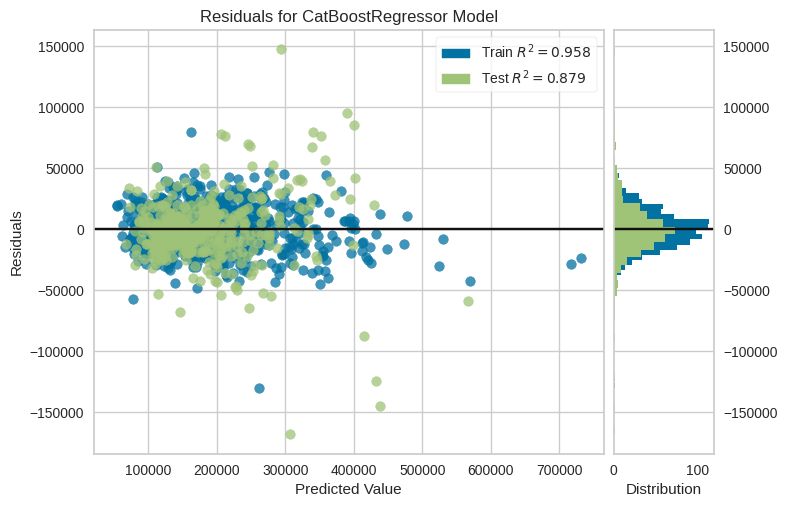

In [7]:
plot_model(tuned_cat)

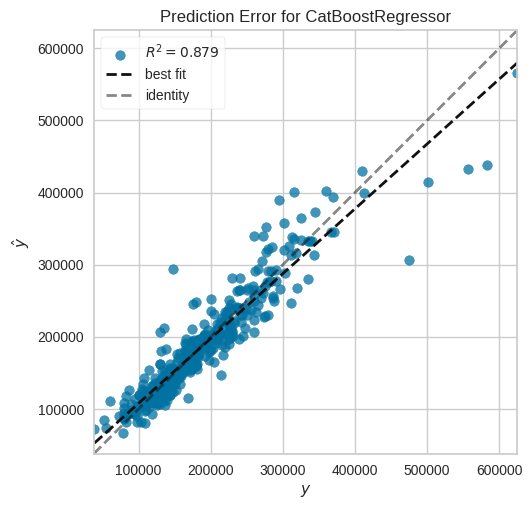

In [8]:
plot_model(tuned_cat, plot='error')

### Plotando a Importância das Variáveis

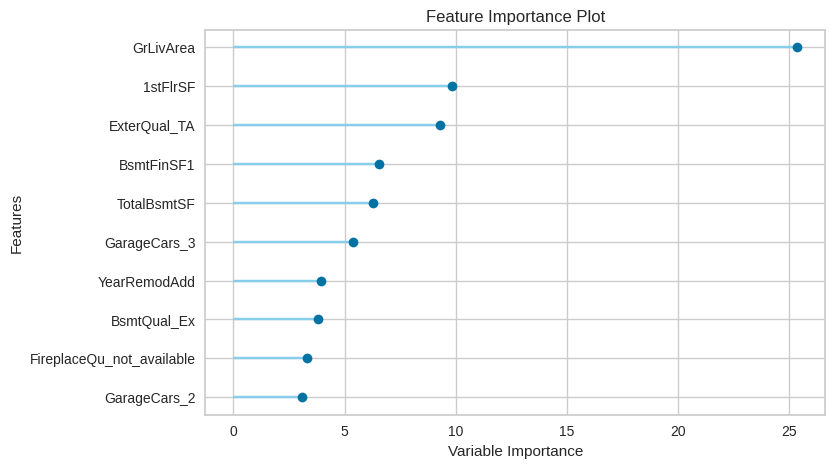

In [9]:
plot_model(tuned_cat, plot='feature')

### Revisando as métricas e prevendo a amostra

In [7]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,16905.9730,691272939.3966,26292.0699,0.8793,0.1327,0.0961


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,69.354309,9505.0,2001.0,2001.0,180.0,0.0,0.0,884.0,884.0,884.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500,236108.283791
1,60.000000,9600.0,1900.0,1950.0,0.0,0.0,0.0,1095.0,1095.0,1095.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000,126783.100107
2,32.000000,3363.0,2004.0,2004.0,117.0,0.0,0.0,976.0,976.0,976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000,162449.187072
3,75.000000,9750.0,1998.0,1998.0,0.0,975.0,0.0,133.0,1108.0,1108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300,226839.568197
4,60.000000,10930.0,1945.0,1950.0,0.0,580.0,0.0,333.0,913.0,1048.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000,139599.071628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,60.000000,6882.0,1914.0,2006.0,0.0,0.0,0.0,684.0,684.0,773.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000,108750.969301
435,50.000000,6000.0,1954.0,1954.0,0.0,0.0,0.0,811.0,811.0,811.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000,93792.223043
436,80.000000,10240.0,2005.0,2005.0,178.0,0.0,0.0,1030.0,1030.0,1038.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500,270823.044504
437,85.000000,10625.0,2003.0,2004.0,292.0,866.0,0.0,132.0,998.0,1006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000,276914.119807


### Finalizando o modelo

In [10]:
final_cat = finalize_model(tuned_cat)

### Importando os dados de testes

In [8]:
url = 'https://raw.githubusercontent.com/FernandoBarbosaB/House_Prediction_with_PyCaret/main/test.csv'
df_test = pd.read_csv(url,index_col=0)
df_test = df_test.reset_index()
df_test.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
147,1608,20,RL,88.0,11896,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
676,2137,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml


### Prevendo os dados de testes

In [11]:
predict = predict_model(final_cat, data=df_test)
predict.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
147,1608,20,RL,88.0,11896,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,200682.269693
676,2137,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml,117044.542041


In [19]:

type(final_cat)

catboost.core.CatBoostRegressor

### Submissão da base de validação

In [12]:
price = pd.DataFrame(predict)
price.rename(columns={'Label':'SalePrice'}, inplace=True)



df_sub = pd.DataFrame({'Id': price.Id, 'SalePrice': np.round(price.SalePrice, 0)})
df_sub.to_csv('catboost.csv', index=False)